In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


Main.Src

In [2]:
using Plots, JLD2

In [3]:
N = 1000
t_end = 50.0
t_fixed = true
M = 500;

### tools

In [56]:
function sobol_index_subplot(fo::Vector, to::Vector, N::Int64, comp::String; title::String="")

    colors = [:blue, :turquoise, :orange, :red]
    parameters = ["a", "m", "w0", "n0"];

    # very stupid way to create time axis
    hprm = Src.Hyperprm(1,1,1,1,M, 0.0)
    sol = Src.sol_klausmeier(hprm, t_fixed=t_fixed, t_end=t_end)
    times = sol[!,"time"]

    si_plot = plot(legend=:topright)

    for k in 1:4
        col = colors[k]
        prm = parameters[k]
        plot!(times, getindex.(fo, k), label="$prm", lw=2, color=col, linestyle=:solid)
        plot!(times, getindex.(to, k), label="", lw=2, color=col, linestyle=:dash)
    end
    #xlabel!("Time")
    ylabel!("Sobol indices $comp")
    title!(title)
    return si_plot
end

function sobol_index_subplot_wn(sobol_n::Vector, sobol_w::Vector; title::String="")

    # extract indices for plotting
    n_fo = [sobol_n[i][:firstorder] for i in 1:M]
    n_to = [sobol_n[i][:totalorder] for i in 1:M]
    w_fo = [sobol_w[i][:firstorder] for i in 1:M]
    w_to = [sobol_w[i][:totalorder] for i in 1:M]

    # plot n compartment
    plot_n = sobol_index_subplot(n_fo, n_to, N, "n", title = title)

    # plot w compartment
    plot_w = sobol_index_subplot(w_fo, w_to, N, "w")

    # compare both
    return plot(plot_n, plot_w, layout=(2,1), size=(700,700))
end

sobol_index_subplot_wn (generic function with 1 method)

## global inits

### load data and create subplots

In [57]:
@load "C:/Users/lisah/Documents/Repos/ma-code/temp_saves/global_inits/dl/sobol_n_$(N)_$(t_end)_$M.jld2" sobol_n
@load "C:/Users/lisah/Documents/Repos/ma-code/temp_saves/global_inits/dl/sobol_w_$(N)_$(t_end)_$M.jld2" sobol_w

plot_left = sobol_index_subplot_wn(sobol_n, sobol_w, title="'a' left of bif pt");

In [58]:
@load "C:/Users/lisah/Documents/Repos/ma-code/temp_saves/global_inits/dm/sobol_n_$(N)_$(t_end)_$M.jld2" sobol_n
@load "C:/Users/lisah/Documents/Repos/ma-code/temp_saves/global_inits/dm/sobol_w_$(N)_$(t_end)_$M.jld2" sobol_w

plot_middle = sobol_index_subplot_wn(sobol_n, sobol_w, title="'a' around bif pt");

In [59]:
@load "C:/Users/lisah/Documents/Repos/ma-code/temp_saves/global_inits/dr/sobol_n_$(N)_$(t_end)_$M.jld2" sobol_n
@load "C:/Users/lisah/Documents/Repos/ma-code/temp_saves/global_inits/dr/sobol_w_$(N)_$(t_end)_$M.jld2" sobol_w

plot_right = sobol_index_subplot_wn(sobol_n, sobol_w, title="'a' right of bif pt");

### compare in figure

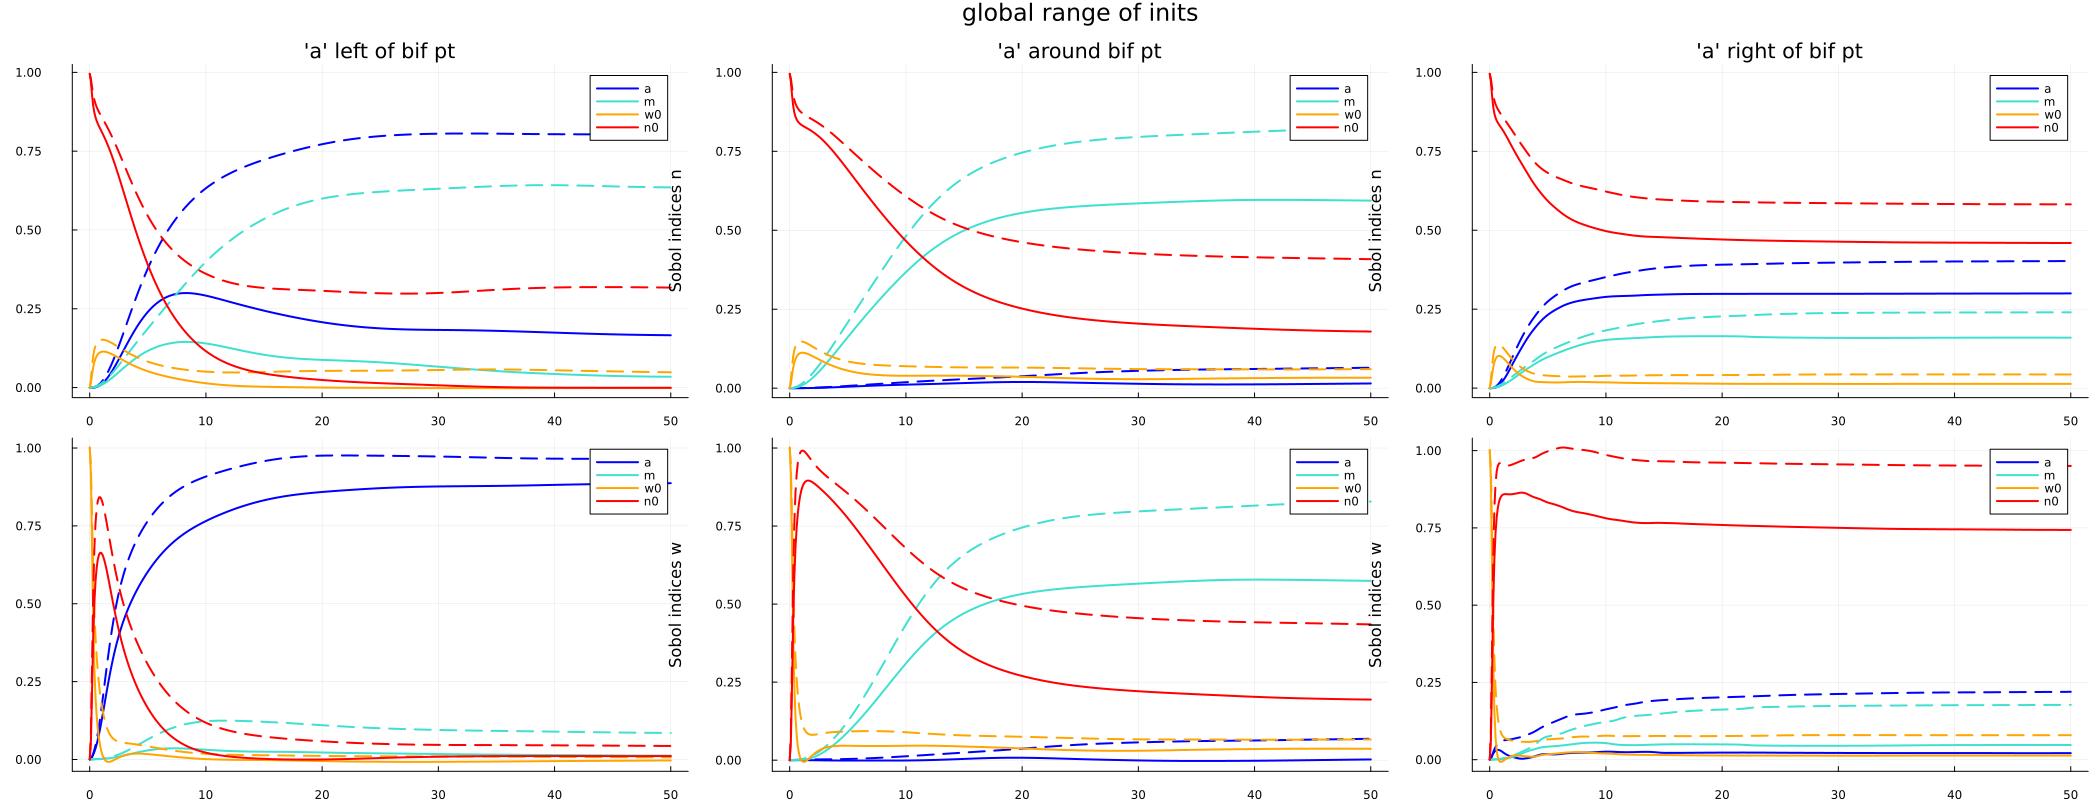

In [65]:
plot(plot_left,plot_middle,plot_right, layout=(1,3), size=(2100,800), suptitle="global range of inits")